In [7]:
import warnings
from jqlib.alpha191 import *

warnings.filterwarnings("ignore")


def get_trade_days(date_start, date_end):
    
    pool = get_index_stocks('000016.XSHG')

    date_list = get_price(pool,start_date=date_start,end_date=date_end,fields=['close'])['close'].index
    return date_list

# 测试开始时间
start_date = '2019-01-01'
# 测试结束时间
end_date = '2020-04-11'
# 测试时间区间的交易日
date_list = get_trade_days(start_date, end_date)
# 获取一段时间股票池191因子数据
factor_data = {}
# 循环获取每天数据
for date in date_list:
    # 获取每天的股票池
    universe = get_index_stocks('000300.XSHG', date=date)
    # 获取每天股票池的因子数据
    _factor_data = alpha_002(code=universe, end_date=date, fq='post')
    # 添加每天的因子数据
    factor_data[date] = _factor_data

# 将字典类型数据转换为DataFrame
factor_data = pd.DataFrame(factor_data).T
# 将 index 转换为 DatetimeIndex
factor_data.index = pd.to_datetime(factor_data.index)



分位数统计


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-2.000000,1.118541,-0.857686,0.618147,18496,20.080775
2,-1.897008,1.380952,-0.333303,0.637361,18391,19.966778
3,-1.823224,1.614439,-0.005642,0.649124,18359,19.932036
4,-1.737847,1.785507,0.331824,0.641749,18385,19.960264
5,-1.590896,2.000000,0.880634,0.623530,18477,20.060147



-------------------------

收益分析


,period_1,period_5,period_10
Ann. alpha,0.053,0.045,0.029
beta,0.070,-0.008,0.046
Mean Period Wise Return Top Quantile (bps),11.138,7.981,8.103
Mean Period Wise Return Bottom Quantile (bps),1.935,7.331,7.704
Mean Period Wise Spread (bps),9.203,0.649,0.400


<Figure size 432x288 with 0 Axes>

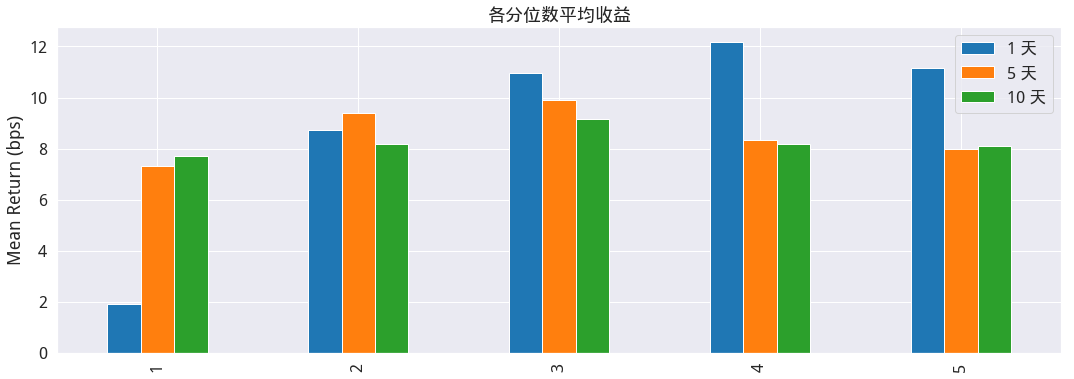

<Figure size 432x288 with 0 Axes>

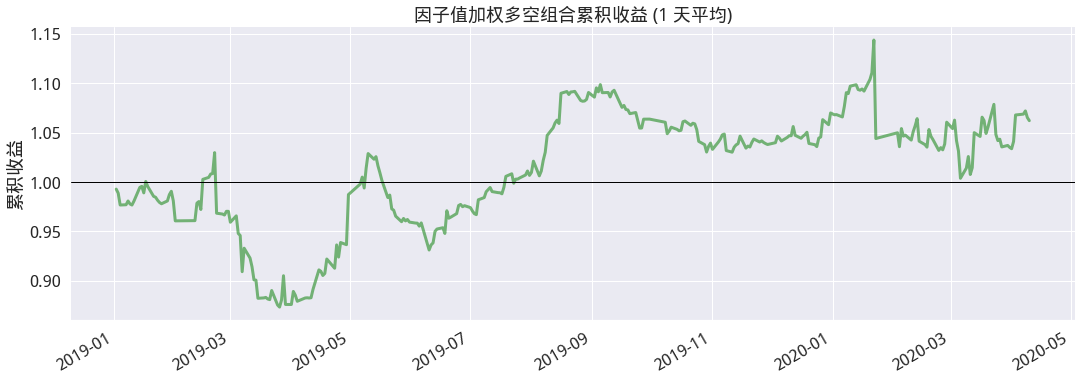

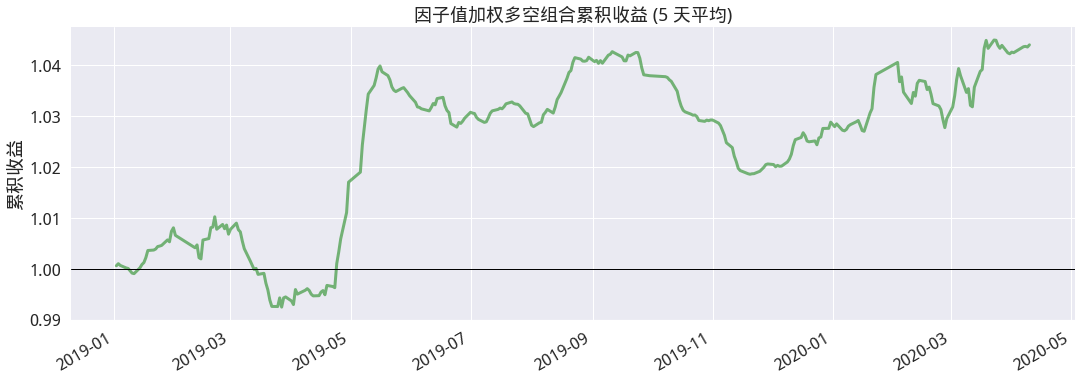

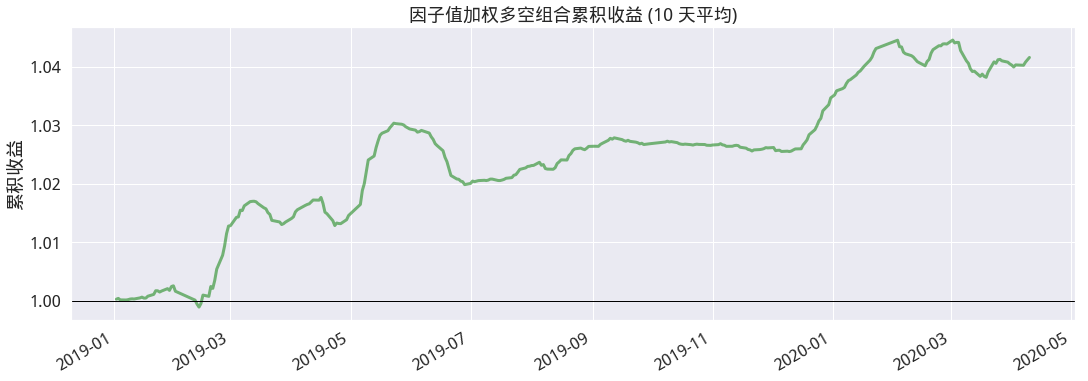

<Figure size 432x288 with 0 Axes>

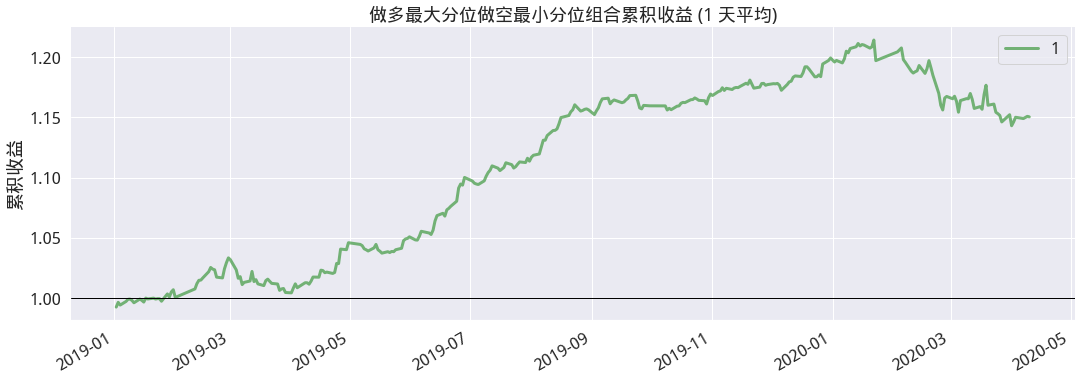

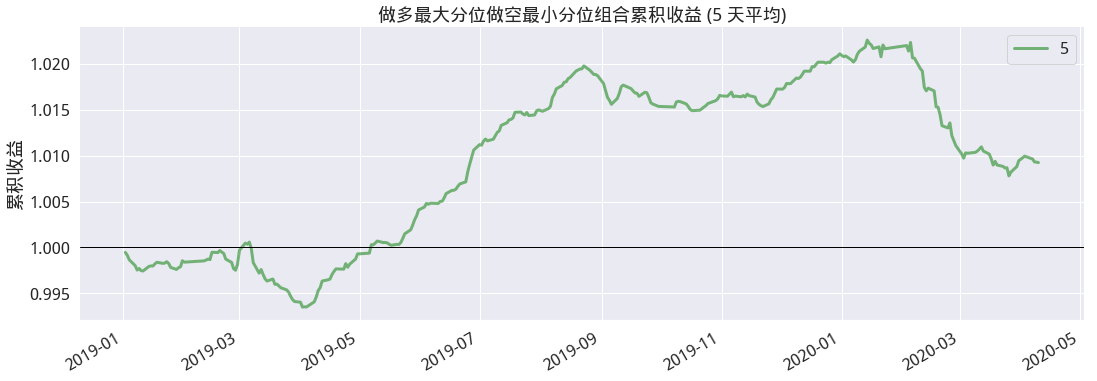

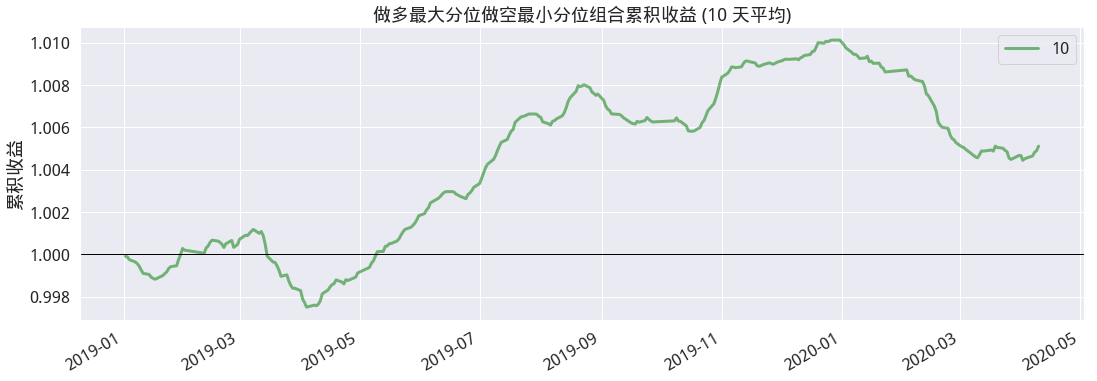

<Figure size 432x288 with 0 Axes>

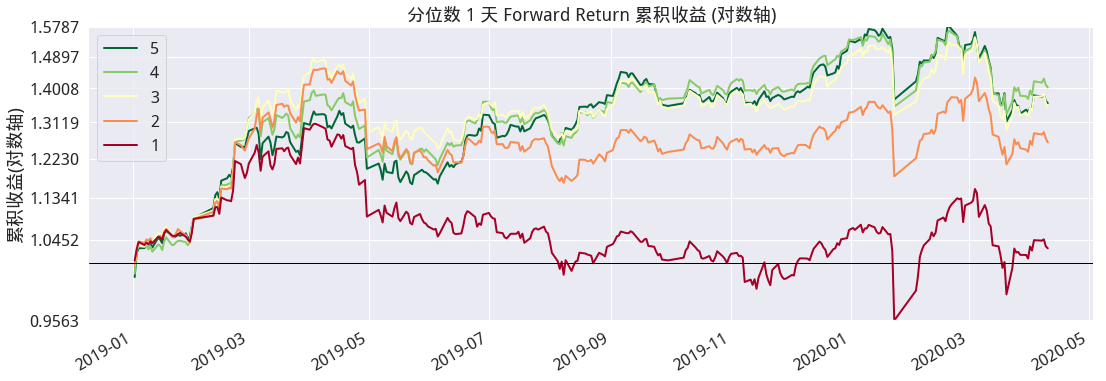

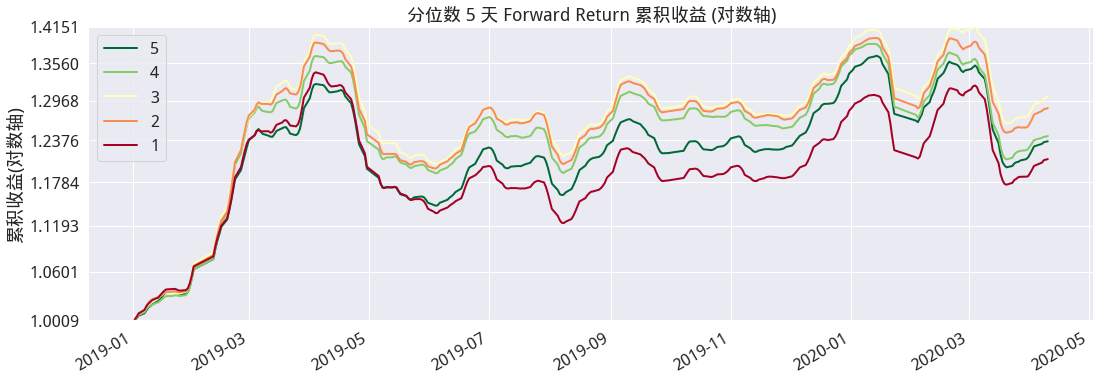

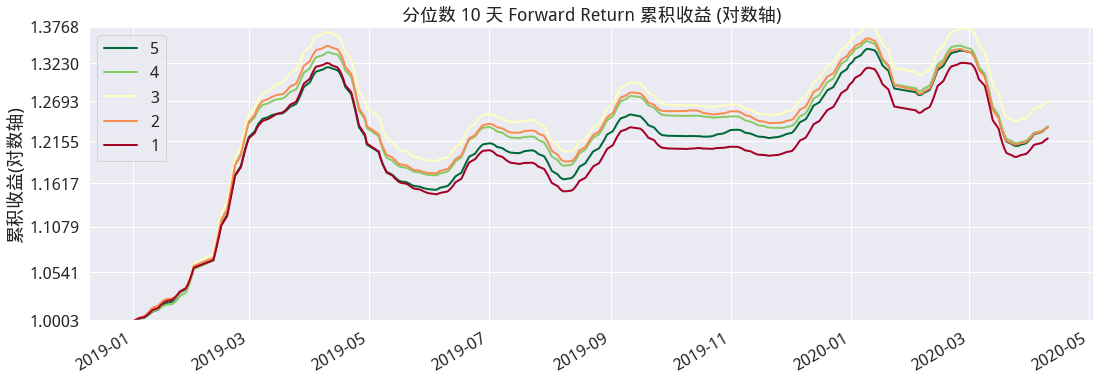

<Figure size 432x288 with 0 Axes>

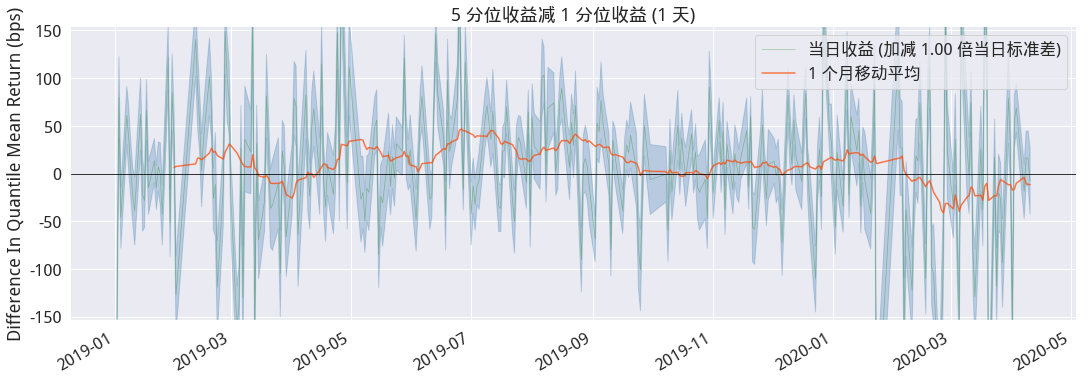

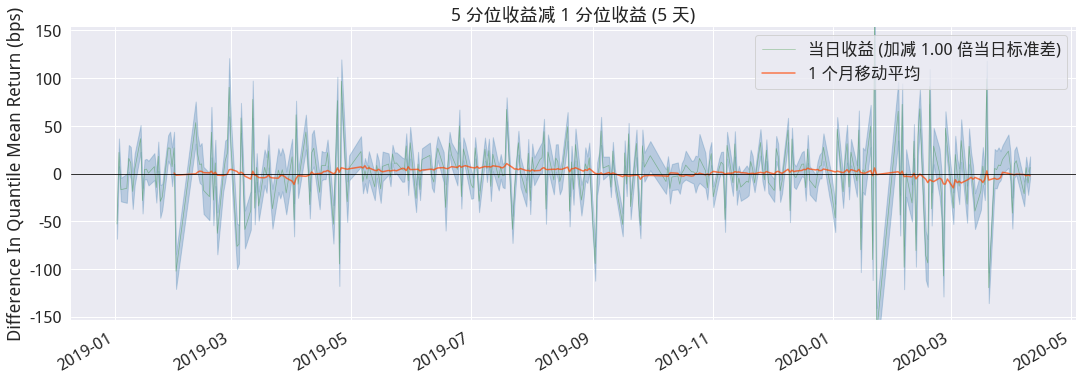

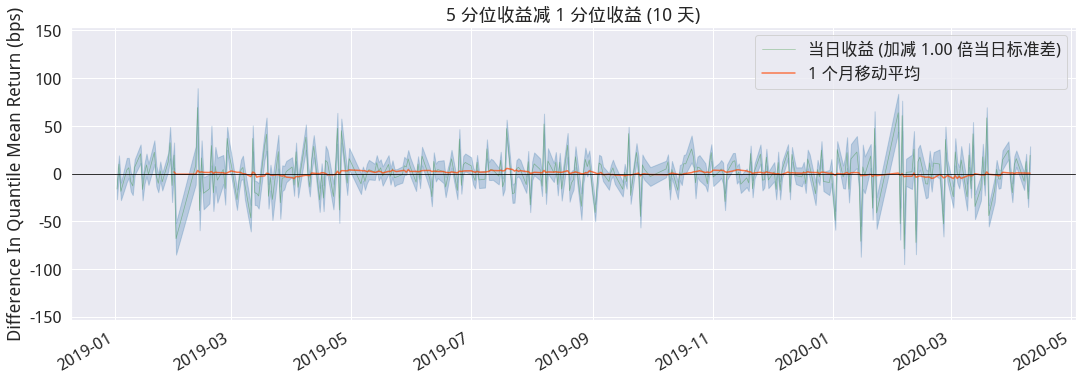


-------------------------

IC 分析


,period_1,period_5,period_10
IC Mean,0.029,0.005,0.004
IC Std.,0.131,0.132,0.122
IR,0.224,0.038,0.034
t-stat(IC),3.935,0.662,0.602
p-value(IC),0.000,0.508,0.547
IC Skew,-0.202,-0.326,-0.181
IC Kurtosis,0.051,0.627,0.896


<Figure size 432x288 with 0 Axes>

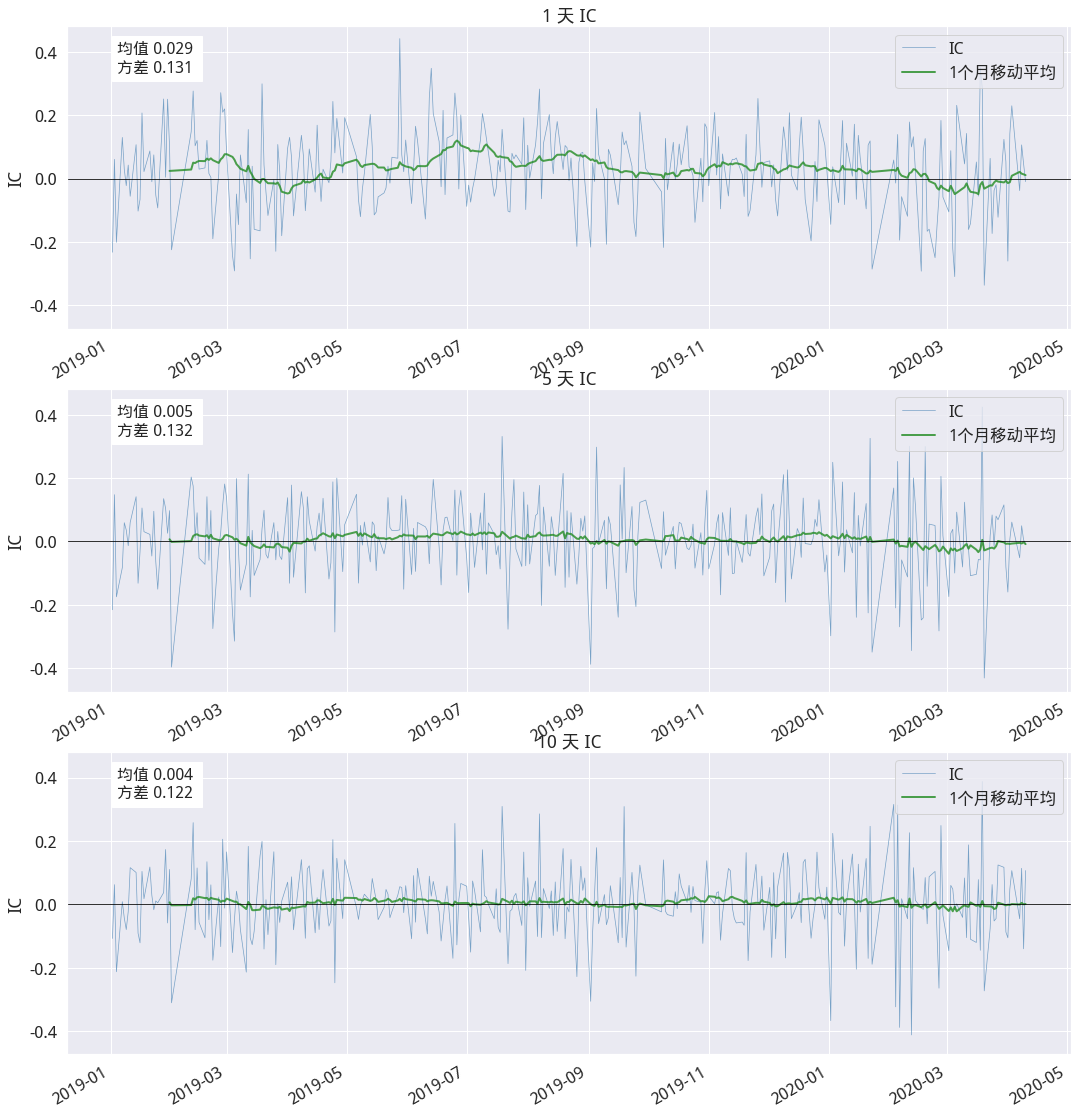

<Figure size 432x288 with 0 Axes>

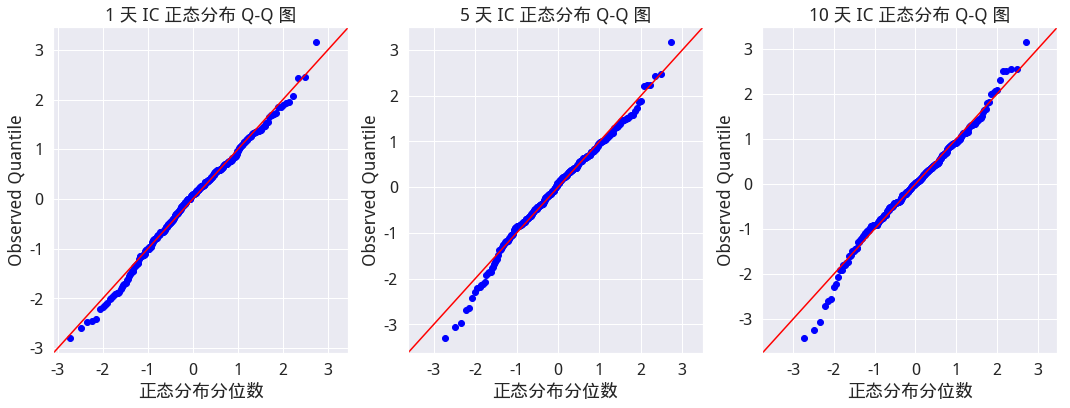

<Figure size 432x288 with 0 Axes>

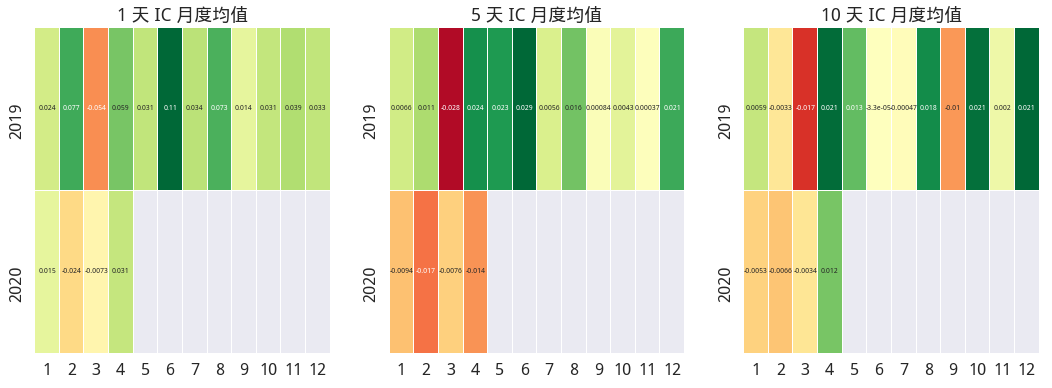


-------------------------

换手率分析


,period_1,period_10,period_5
Quantile 1 Mean Turnover,0.953,0.796,0.796
Quantile 2 Mean Turnover,0.830,0.805,0.797
Quantile 3 Mean Turnover,0.766,0.793,0.797
Quantile 4 Mean Turnover,0.834,0.806,0.801
Quantile 5 Mean Turnover,0.954,0.800,0.793


,period_1,period_5,period_10
Mean Factor Rank Autocorrelation,-0.479,0.003,-0.002


<Figure size 432x288 with 0 Axes>

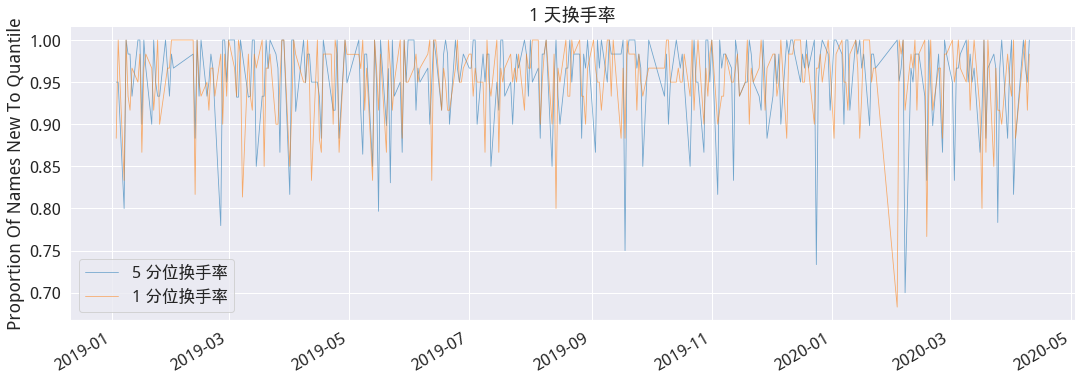

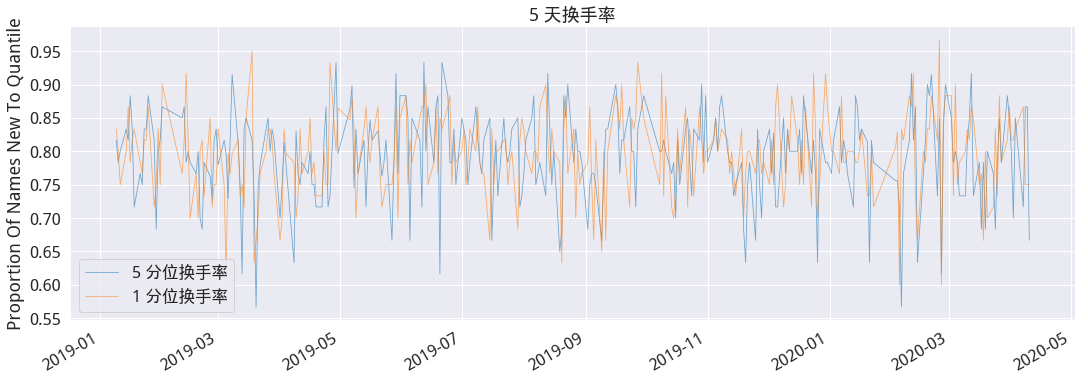

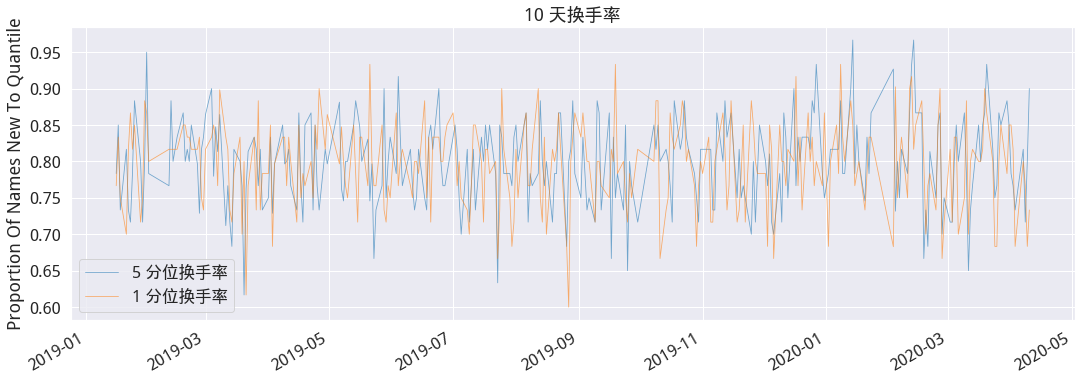

<Figure size 432x288 with 0 Axes>

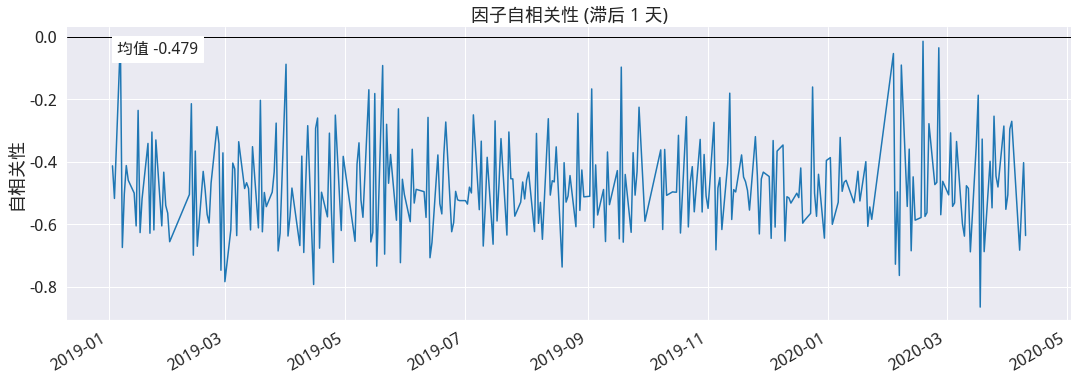

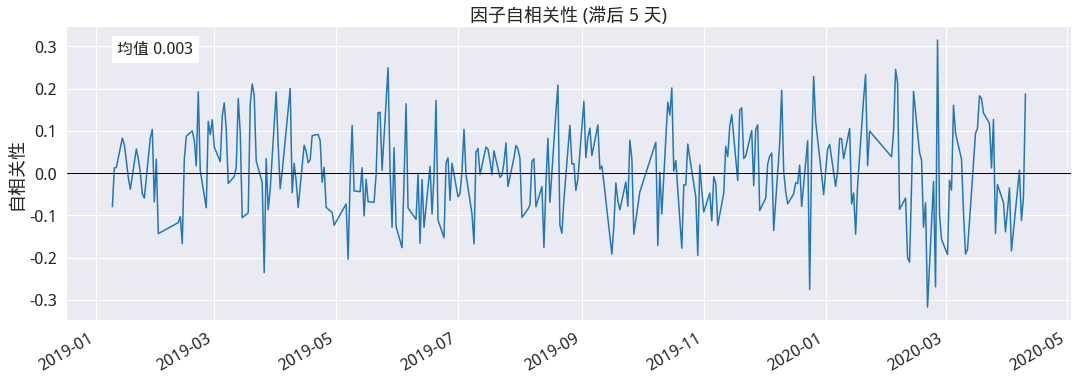

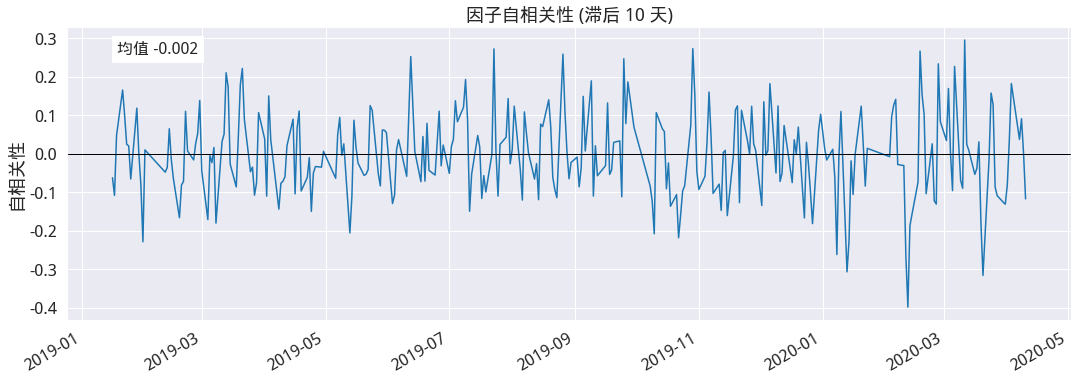


-------------------------



<Figure size 432x288 with 0 Axes>

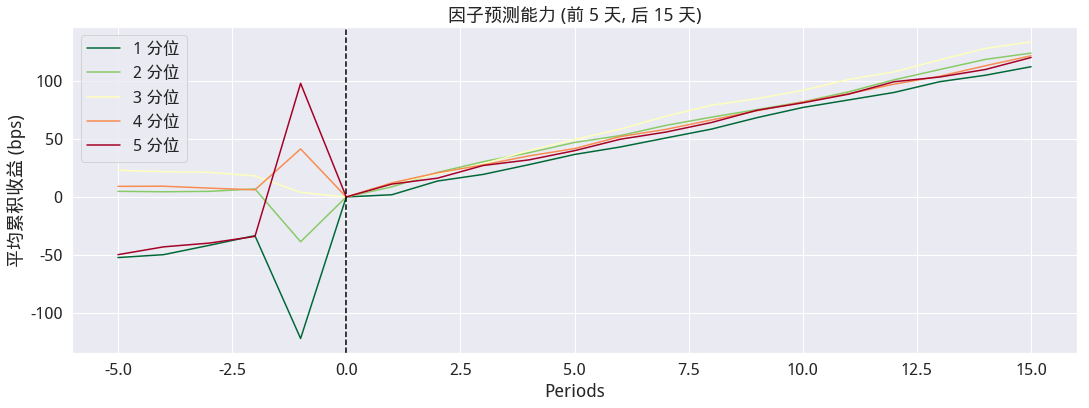

In [6]:
from jqfactor import *
# 对因子进行分析，参数使用默认值
far = analyze_factor(factor=factor_data, )
# 展示全部分析
far.create_full_tear_sheet(demeaned=False, group_adjust=False, by_group=False, turnover_periods=None, 
                           avgretplot=(5, 15), std_bar=False)